In [1]:
import torch
import numpy as np
import torch.nn as nn
from torch.autograd import Variable
from modules.stn import STN
from modules.gridgen import CylinderGridGenV2, AffineGridGen
from PIL import Image
from matplotlib import mlab
import matplotlib.pyplot as plt
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [2]:
cgen = CylinderGridGenV2(64, 128)

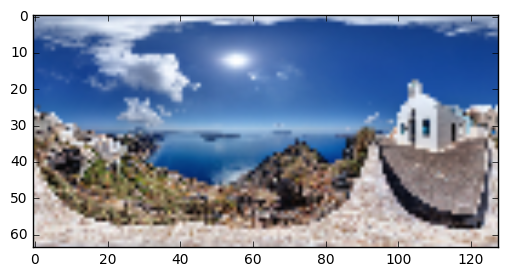

In [3]:
from PIL import ImageFilter
img = Image.open('equi.png').convert('RGB').resize((128,64))
img = np.array(img)/255.0
plt.imshow(img)

In [4]:
input1 = Variable(torch.from_numpy(np.expand_dims(img.astype(np.float32), 0)))

In [5]:
st = STN()

In [6]:
input2 = Variable(torch.from_numpy(np.array([[0.6]]).astype(np.float32)))
print(input2)

Variable containing:
 0.6000
[torch.FloatTensor of size 1x1]



In [7]:
out = cgen(input2)


In [8]:
imgout = st(input1, out)

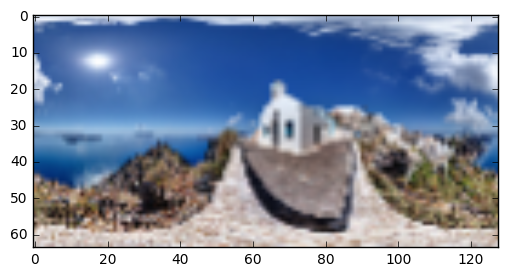

In [9]:
plt.imshow(imgout.data.numpy()[0][:,:,0:3])

In [10]:
class CylinderTransformer(nn.Module):
    def __init__(self):
        super(CylinderTransformer, self).__init__()
        self.s = STN()
        self.g = CylinderGridGenV2(64, 128, lr = 1)
    def forward(self,input1, input2):
        out = self.g(input2)
        out2 = self.s(input1, out)
        return out2

In [11]:
target = imgout.detach()
tc = CylinderTransformer()
crt = nn.L1Loss()

In [12]:
x = []
y = []
g_ = []

for i in np.arange(0,5,0.002):
    x.append(i)
    input2 = Variable(torch.from_numpy(np.array([[i]], dtype=np.float32)) , requires_grad = True)
    out = tc(input1, input2)
    err = crt(out, target)
    err.backward()
    y.append(err.data[0])
    g_.append(input2.grad.data[0][0])

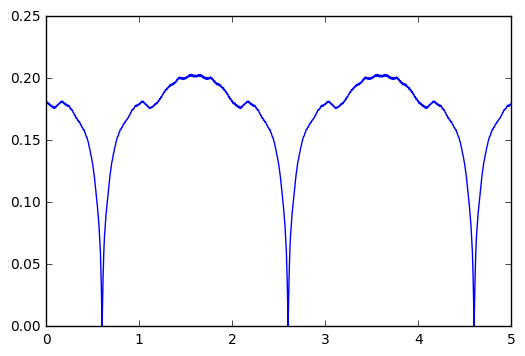

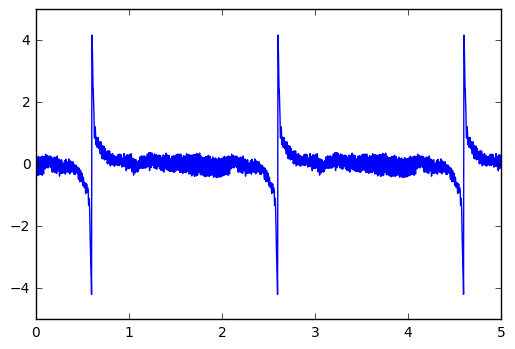

In [13]:
plt.figure()
plt.plot(x,y)
plt.figure()
plt.plot(x,g_)

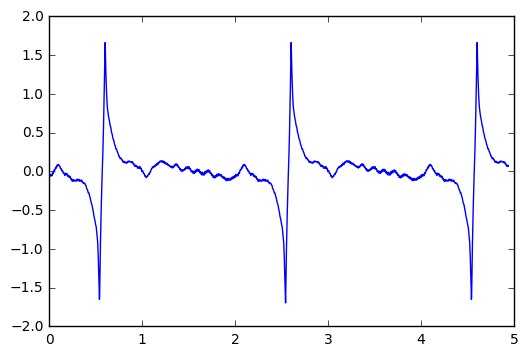

In [16]:
g__ = []
for i in range(len(np.array(g_))-30):
    g__.append(np.mean(g_[i:i+30]))
    
plt.plot(x[:-30], g__)